<a href="https://colab.research.google.com/github/sejinseo/Itwill_Python/blob/main/ml09_classification(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# 이진 분류(Binary Class Classification)

* scikit-learn 패키지의 breast cancer 예제 데이터 셋을 로딩.
* 악성종양(malignant)/양성종양(benign): 진짜 암/암이 아닌 종양을 분류하는 이진 분류 문제.
* 3가지 머신 러닝 분류 모델을 비교
    * KNN
    * Logistic Regression
    * SGD

## Breast cancer datasets 준비

In [161]:
cancer = load_breast_cancer()

In [162]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [163]:
# 특성 행렬(2차원 배열), 타겟 배열
X, y = cancer['data'], cancer['target']

In [164]:
X.shape, y.shape

((569, 30), (569,))

In [165]:
cancer['feature_names'] # 특성(변수, 컬럼) 이름들

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [166]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [167]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [168]:
X[:3, :]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [169]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [170]:
y[-10:]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

## 훈련 셋, 테스트 셋 분리

층화 추출(stratified sampling)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=42)

In [172]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [173]:
y_train.shape, y_test.shape

((455,), (114,))

In [174]:
print('Train target:', np.unique(y_train, return_counts=True))
print('Test target', np.unique(y_test, return_counts=True))

Train target: (array([0, 1]), array([170, 285]))
Test target (array([0, 1]), array([42, 72]))


## KNN Classifier

In [175]:
# 모델 생성
knn_model = Pipeline(steps=[('scaler', StandardScaler()),
                            ('clf', KNeighborsClassifier())])

In [176]:
# 모델 훈련
knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

### 훈련 셋 평가

In [177]:
# 훈련 셋 예측값
train_pred = knn_model.predict(X_train)
print(train_pred[:10])

[1 0 1 1 1 1 1 1 1 1]


In [178]:
print(y_train[:10])

[1 0 1 1 1 1 1 1 1 1]


In [179]:
confusion_matrix(y_train, train_pred)

array([[161,   9],
       [  3, 282]])

In [180]:
# 정확도: 전체 샘플 중에서 양성(암)과 음성(단순 종양)을 정확히 분류한 비율
(161 + 282) / (161 + 9 + 3 + 282) # (TP + TN) / (TP + FN + FP + TN)

0.9736263736263736

In [181]:
accuracy_score(y_train, train_pred)

0.9736263736263736

In [182]:
# 정밀도: 양성(Positive=1) 예측들 중에서 정답의 비율. 
# -> 일반 종양으로 예측한 것들 중에서 진짜 일반 종양들의 비율
282 / (9 + 282) # TP / (TP + FP)

0.9690721649484536

In [183]:
precision_score(y_train, train_pred)

0.9690721649484536

In [184]:
# 재현율: 실제 양성(Positive=1) 예측들 중에서 정답 비율.
# -> 실제로 일반 종양들 중에서 진짜 일반 종양들의 비율.
282 / (282 + 3) # TP / (TP / FN)

0.9894736842105263

In [185]:
recall_score(y_train, train_pred)

0.9894736842105263

In [186]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       170
           1       0.97      0.99      0.98       285

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [187]:
# 암의 정밀도: 암으로 예측한 샘플들 중에서 정답 비율
161 / (161 + 3)

0.9817073170731707

In [188]:
precision_score(y_train, train_pred, pos_label=0)

0.9817073170731707

In [189]:
# 암의 재현율: 실제 암 샘플들 중에서 정답 비율.
161 / (161 + 9)

0.9470588235294117

In [190]:
recall_score(y_train, train_pred, pos_label=0)

0.9470588235294117

In [191]:
# 암의 F1 score
2 / (1 / 0.98 + 1/0.95)

0.9647668393782384

### 테스트 셋 평가

In [192]:
# 테스트 셋의 예측값
test_pred = knn_model.predict(X_test)

In [193]:
confusion_matrix(y_test, test_pred)

array([[39,  3],
       [ 2, 70]])

In [194]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [195]:
(39 + 70) / (39 + 3 + 2 + 70)

0.956140350877193

**ROC(Receiver Operating Characteristic) Curve**

가짜 양성 비율(FPR: False Positive Rate)에 대한 진짜 양성 비율(TPR: True Positive Rate)의 곡선. FPR을 x축에, TPR을 y축에 그린 곡선.
* __특이도(spercificity)__: 진짜 양성 비율(__TPR__). 실제 음성 샘플들 중에서 음성으로 맞게 예측한 비율. TN / (FP + TN)
* __FPR(가짜 양성 비율)__ = FP / (FP + TN) = 1 - TN / (FP + TN) = 1 - TNR
* __민감도(senstivity)__: 진짜 양성 비율.(__TPR__). 실제 양성 샘플들 중에서 양성으로 맞게 예측한 비율. __재현율(recall)__. TP / (TP + FN)
    * __AUC(Area Under Curve)__: ROC 곡선의 아래쪽 넓이.
        * AUC가 1에 가까울 수록 좋은 분류 모델.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


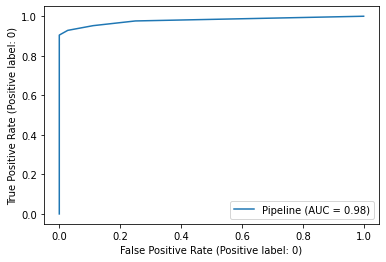

In [196]:
# 암(Malignant)을 양성(Positive)로 생각한 특이도/민감도 관계 그래프(ROC curve)
plot_roc_curve(estimator=knn_model, X=X_test, y=y_test, pos_label=0)

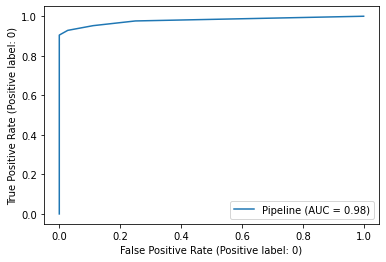

In [197]:
RocCurveDisplay.from_estimator(estimator=knn_model, X=X_test, y=y_test, pos_label=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


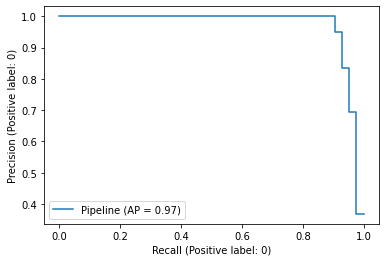

In [198]:
# precision(정밀도) recall(재현율) curve
# 정밀도-재현율 tradeoff: 정밀도가 커지면 재현율이 작아지고, 반대로 재현율이 커지면 정밀도가 작아짐.
# 곡선의 아래쪽 넓이가 1에 가까울 수록 좋은 분류 모델.
plot_precision_recall_curve(estimator=knn_model, X=X_test, y=y_test, pos_label=0)

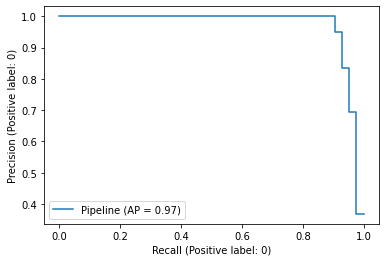

In [199]:
PrecisionRecallDisplay.from_estimator(estimator=knn_model, X=X_test, y=y_test, pos_label=0)

## Logistic Regression

In [200]:
# 모델 생성
logit_model = Pipeline(steps=[('scaler', StandardScaler()), 
                              ('clf', LogisticRegression(random_state=42))])

In [201]:
# 모델 훈련
logit_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])

### 훈련 셋 평가

In [202]:
# 훈련 셋 예측값
train_pred = logit_model.predict(X_train)

In [203]:
# 훈련 셋 오차행렬
confusion_matrix(y_train, train_pred)

array([[166,   4],
       [  1, 284]])

In [204]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       170
           1       0.99      1.00      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



### 테스트 셋 평가

In [205]:
test_pred = logit_model.predict(X_test)

In [206]:
confusion_matrix(y_test, test_pred)

array([[41,  1],
       [ 1, 71]])

In [207]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



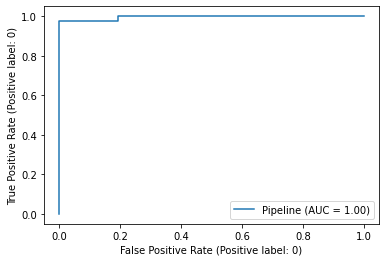

In [208]:
RocCurveDisplay.from_estimator(estimator=logit_model, X=X_test, y=y_test, pos_label=0)

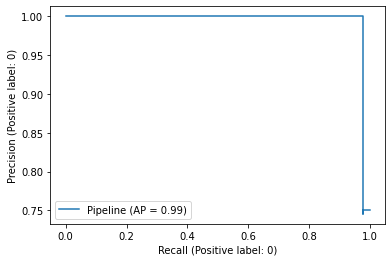

In [209]:
PrecisionRecallDisplay.from_estimator(estimator=logit_model, X=X_test, y=y_test, pos_label=0)

## SGD Classifier

In [210]:
# 모델 생성
sgd_model = Pipeline(steps=[('scaler', StandardScaler()),
                            ('clf', SGDClassifier())])

In [211]:
# 모델 훈련
sgd_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SGDClassifier())])

### 훈련 셋 평가

In [212]:
train_pred = sgd_model.predict(X_train)

In [213]:
confusion_matrix(y_train, train_pred)

array([[169,   1],
       [  4, 281]])

In [214]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       170
           1       1.00      0.99      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



### 테스트 셋 평가

In [215]:
test_pred = sgd_model.predict(X_test)

In [216]:
confusion_matrix(y_test, test_pred)

array([[41,  1],
       [ 5, 67]])

In [217]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



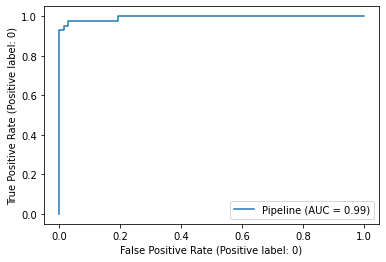

In [218]:
RocCurveDisplay.from_estimator(estimator=sgd_model, X=X_test, y=y_test, pos_label=0)

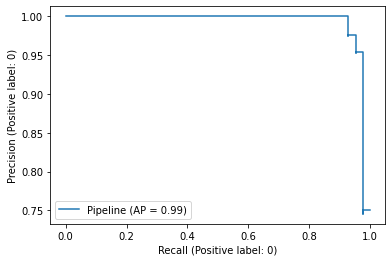

In [219]:
PrecisionRecallDisplay.from_estimator(estimator=sgd_model, X=X_test, y=y_test, pos_label=0)

# 다중 클래스 분류(Multi-class Classification)

* scikit-learn 패키지의 iris 예제 데이터 셋을 로딩
* setosa/versicolor/virginca: 3개 클래스를 갖는 분류 문제.
* 3가지 머신 러닝 분류 모델 비교

## Iris 데이터 셋 준비

In [220]:
X, y = load_iris(return_X_y=True)

In [221]:
X[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [222]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [223]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

## 훈련 셋, 테스트 셋 분리

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [225]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

## KNN Classifier

In [226]:
knn_model = Pipeline(steps=[('scaler', StandardScaler()),
                            ('clf', KNeighborsClassifier())])

In [227]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

### 훈련 셋 평가

In [228]:
train_pred = knn_model.predict(X_train)

In [229]:
confusion_matrix(y_train, train_pred)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

In [230]:
accuracy_score(y_train, train_pred)

0.975

### 테스트 셋 평가

In [231]:
test_pred = knn_model.predict(X_test)

In [232]:
confusion_matrix(y_test, test_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

In [233]:
accuracy_score(y_test, test_pred)

0.9333333333333333

## Logistic Regression

In [234]:
logit_model = Pipeline(steps=[('scaler', StandardScaler()),
                              ('clf', LogisticRegression())])

In [235]:
logit_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

### 훈련 셋 평가

In [236]:
train_pred = logit_model.predict(X_train)

In [237]:
confusion_matrix(y_train, train_pred)

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  3, 37]])

In [238]:
accuracy_score(y_train, train_pred)

0.9583333333333334

### 테스트 셋 평가

In [239]:
test_pred = logit_model.predict(X_test)

In [240]:
confusion_matrix(y_test, test_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

In [241]:
accuracy_score(y_test, test_pred)

0.9333333333333333

Logistic Regression 모델은 테스트 셋에서의 정확도가 KNN 모델에서의 정확도와 같지만, 과대적합(overfitting)의 정도는 KNN에 비해 적습니다. Logistic Regression 모델이 일반화가 더 잘 되는 모델이라고 예상할 수 있습니다.

## SGD Classifier

loss='log'인 경우

In [246]:
sgd_model1 = Pipeline(steps=[('scaler', StandardScaler()),
                             ('clf', SGDClassifier(loss='log', random_state=42))])

In [247]:
sgd_model1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SGDClassifier(loss='log', random_state=42))])

### 훈련 셋 평가

In [248]:
train_pred = sgd_model1.predict(X_train)

In [249]:
confusion_matrix(y_train, train_pred)

array([[40,  0,  0],
       [ 0, 32,  8],
       [ 0,  0, 40]])

In [250]:
accuracy_score(y_train, train_pred)

0.9333333333333333

### 테스트 셋 평가

In [252]:
test_pred = sgd_model1.predict(X_test)

In [253]:
confusion_matrix(y_test, test_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [254]:
accuracy_score(y_test, test_pred)

0.9666666666666667

## SGD Classifier

log='hinge'인 경우

In [259]:
sgd_model2 = Pipeline(steps=[('scaler', StandardScaler()),
                             ('clf', SGDClassifier(random_state=42))])

In [260]:
sgd_model2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SGDClassifier(random_state=42))])

### 훈련 셋 평가

In [261]:
train_pred = sgd_model2.predict(X_train)

In [262]:
confusion_matrix(y_train, train_pred)

array([[40,  0,  0],
       [ 1, 35,  4],
       [ 0,  1, 39]])

In [267]:
accuracy_score(y_train, train_pred)

0.95

### 테스트 셋 평가

In [264]:
test_pred = sgd_model2.predict(X_test)

In [265]:
confusion_matrix(y_test, test_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

In [266]:
accuracy_score(y_test, test_pred)

0.9333333333333333